# Valeurs manquantes et factorisation de matrices

Réflexion autour des valeur manquantes et de la factorisation de matrice positive.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Matrice à coefficients aléatoires

On étudie la factorisation d'une matrice à coefficients tout à fait aléatoires qui suivent une loi uniforme sur l'intervalle $[0,1]$. Essayons sur une petite matrice :

In [ ]:
from numpy.random import rand
M = rand(3, 3)
M

array([[ 0.35210993,  0.70885582,  0.9812406 ],
       [ 0.21268583,  0.62865359,  0.989847  ],
       [ 0.34155875,  0.00865411,  0.7438777 ]])

In [ ]:
from sklearn.decomposition import NMF
mf = NMF(1)
mf.fit_transform(M)

array([[ 0.91624473],
       [ 0.86659193],
       [ 0.52784713]])

La matrice précédente est la matrice $W$ dans le produit $WH$, la matrice qui suit est $H$.

In [ ]:
mf.components_

array([[ 0.36767339,  0.64139644,  1.15001541]])

In [ ]:
mf.reconstruction_err_ / (M.shape[0] * M.shape[1])

0.0479265438068966

On recalcule l'erreur :

In [ ]:
d = M - mf.fit_transform(M) @ mf.components_
a = d.ravel()
e = a @ a.T
e ** 0.5 / (M.shape[0] * M.shape[1])

0.0479265438068966

In [ ]:
e.ravel()

array([ 0.18605324])

Et maintenant sur une grande et plus nécessairement carrée :

In [ ]:
M = rand(300, 10)
mf = NMF(1)
mf.fit_transform(M)
mf.reconstruction_err_ / (M.shape[0] * M.shape[1])

0.005031615240081511

L'erreur est la même :

In [ ]:
errs = []
rangs = list(range(1, 11))
for k in rangs:
    mf = NMF(k)
    mf.fit_transform(M)
    e = mf.reconstruction_err_ / (M.shape[0] * M.shape[1])
    errs.append(e)

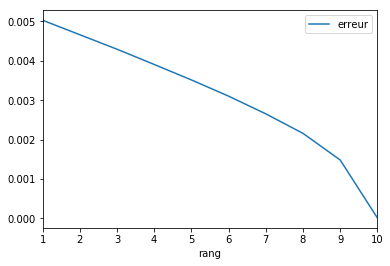

In [ ]:
import pandas
df = pandas.DataFrame(dict(rang=rangs, erreur=errs))
df.plot(x="rang", y="erreur")

## Matrice avec des vecteurs colonnes corrélés

Supposons maintenant que la matrice précédente $M$ est de rang 3. Pour s'en assurer, on tire une matrice aléalatoire avec 3 vecteurs colonnes et on réplique des colonnes jusqu'à la dimension souhaitée.

In [ ]:
from numpy import hstack
M = rand(300, 3)
M = hstack([M, M, M, M[:,:1]])
M.shape

(300, 10)

In [ ]:
errs = []
rangs = list(range(1, 11))
for k in rangs:
    mf = NMF(k)
    mf.fit_transform(M)
    e = mf.reconstruction_err_ / (M.shape[0] * M.shape[1])
    errs.append(e)

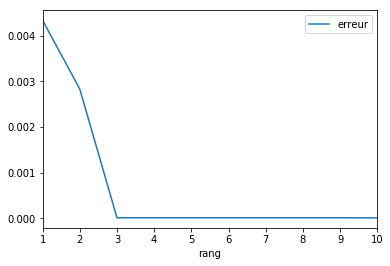

In [ ]:
import pandas
df = pandas.DataFrame(dict(rang=rangs, erreur=errs))
df.plot(x="rang", y="erreur")

On essaye à nouveausur une matrice un peu plus petite.

In [ ]:
M = rand(3, 2)
M = hstack([M, M[:,:1]])
M

array([[ 0.56055869,  0.75611955,  0.56055869],
       [ 0.22366295,  0.53294088,  0.22366295],
       [ 0.6852681 ,  0.74240475,  0.6852681 ]])

In [ ]:
mf = NMF(2)
mf.fit_transform(M)

array([[ 0.78609057,  0.31700836],
       [ 0.31364721,  0.61911077],
       [ 0.96096593,  0.        ]])

In [ ]:
mf.components_

array([[ 0.71310095,  0.77256331,  0.71310095],
       [ 0.        ,  0.46943025,  0.        ]])

La dernière colonne est identique à la première.

## Matrice identité

Et maintenant si la matrice $M$ est la matrice identité, que se passe-t-il ?

In [ ]:
from numpy import identity
M = identity(3)
M

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [ ]:
mf = NMF(1)
mf.fit_transform(M)

array([[ 1.],
       [ 0.],
       [ 0.]])

In [ ]:
mf.components_

array([[ 1.,  0.,  0.]])

In [ ]:
mf.reconstruction_err_ ** 2

2.0000000000000004

On essaye avec $k=2$.

In [ ]:
mf = NMF(2)
mf.fit_transform(M)

array([[ 1.        ,  0.        ],
       [ 0.        ,  0.9701425 ],
       [ 0.        ,  0.24253563]])

In [ ]:
mf.components_

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.9701425 ,  0.24253563]])

In [ ]:
mf.reconstruction_err_ ** 2

1.0

Avec des vecteurs normés et indépendants (formant donc une base de l'espace vectoriel), l'algorithme about à une matrice $W$ égale au $k$ premiers vecteurs et oublie les autres.